# Data analysis ACS PUMS Income dataset
This notebook provides all code for the data analysis images from "A Holistic Analysis of Bias Assessment within Federated Learning"

In [28]:
import os
import pandas as pd
import plotly.graph_objects as gp
import matplotlib.pyplot as plt
current_path = os.getcwd()

In [29]:
folderpath = os.path.join(current_path, 'acs_data')
file_list = os.listdir(folderpath)
file_list.remove('ACS-2022-complete.csv')
list_state_df = [pd.read_csv(os.path.join(folderpath, file)) for file in file_list]
df_all_states = pd.concat(list_state_df, ignore_index=True)
df_all_states = df_all_states.drop('State',axis=1)
df_all_states.head()
len(df_all_states)

1737629

In [30]:
df_all_states['Sex'].value_counts()

Sex
1    904275
2    833354
Name: count, dtype: int64

In [31]:
print(1589519 / len(df_all_states) * 100)
df_all_states['Sex'].value_counts()


91.47631629076172


Sex
1    904275
2    833354
Name: count, dtype: int64

In [32]:
# total population sizes per state
entire_population = {
 'AL': 5039877,
 'AK': 732441,
 'AZ': 7233988,
 'AR': 3011524,
 'CA': 39237836,
 'CO': 5826185,
 'CT': 3596298,
 'DE': 1004523,
 'FL': 22229952,
 'GA': 10725135,
 'HI': 1411151,
 'ID': 1900923,
 'IL': 12538344,
 'IN': 6805985,
 'IA': 3193079,
 'KS': 2910341,
 'KY': 4509394,
 'LA': 4622982,
 'ME': 1354522,
 'MD': 6185278,
 'MA': 6911743,
 'MI': 9989642,
 'MN': 5726298,
 'MS': 2951996,
 'MO': 6147027,
 'MT': 1100185,
 'NE': 1962071,
 'NV': 3241676,
 'NH': 1377088,
 'NJ': 9288994,
 'NM': 2097022,
 'NY': 19377858,
 'NC': 10600823,
 'ND': 800394,
 'OH': 11642640,
 'OK': 4007177,
 'OR': 4241507,
 'PA': 12964056,
 'RI': 1071140,
 'SC': 5347796,
 'SD': 901165,
 'TN': 7056933,
 'TX': 30077954,
 'UT': 3350582,
 'VT': 647156,
 'VA': 8711177,
 'WA': 7705281,
 'WV': 1780573,
 'WI': 5895908,
 'WY': 576850,
 'PR': 3193694
}



In [33]:
# create dataframe per state
df_per_state = pd.DataFrame(columns=['State', 'Size', 'Population', 'Size Percentage', '#Males', '#Females', '#Whites', '#Non_whites', 'Mean Age',  '#>50k', '#<50k', '%>50k', 'female_>50k', 'male_>50k', 'white_>50k', 'non_white_>50k'])

# loop through all states
for df in list_state_df:
    state = df.loc[0, 'State']
    
    # obtain number of total individuals, males, females, whites, non-whites
    size = len(df)
    population = entire_population[state]
    size_percentage = (size / population) * 100
    males = df['Sex'].value_counts()[1]
    females = df['Sex'].value_counts()[2]
    whites = df['Race'].value_counts()[1]
    non_whites = size - whites

    assert size == males + females, "Sizes don't add up"

    # calculate percentage that earns above/below 50k
    below_50k = df.groupby('Income').size()['<=50K']
    above_50k = df.groupby('Income').size()['>50K']
    percentage = (above_50k / (above_50k + below_50k)) * 100

    # count females and males with income above/below 50k
    count_sex = df[['Sex', 'Income']].value_counts(ascending=True).reset_index(name='count')
    female_above_50k = count_sex.loc[(count_sex['Sex'] == 2 ) & (count_sex['Income'] == '>50K')]['count'].sum()
    male_above_50k = count_sex.loc[(count_sex['Sex'] == 1 ) & (count_sex['Income'] == '>50K')]['count'].sum()
    
    # count non-whites and whites with income above/below 50k
    count_race = df[['Race', 'Income']].value_counts(ascending=True).reset_index(name='count')
    non_white_above_50k = count_race.loc[(count_race['Race'].isin([2, 3, 4, 5, 6, 7, 8, 9])) & (count_race['Income'] == '>50K')]['count'].sum()
    white_above_50k = count_race.loc[(count_race['Race'] == 1) & (count_race['Income'] == '>50K')]['count'].sum()
    
    # calculate mean age per state
    mean_age = df.loc[:, 'Age'].mean().round(2)

    # create dataframe with all relevant variables
    new_row = {'State': state, 'Size': size, 'Population': population, 'Size Percentage':size_percentage, '#Males':males, '#Females':females, '#Whites':whites, '#Non_whites':non_whites, 'Mean Age':mean_age, '#>50k': above_50k, '#<50k': below_50k, 'female_>50k':female_above_50k, 'male_>50k':male_above_50k, 'white_>50k': white_above_50k, 'non_white_>50k': non_white_above_50k,'%>50k':percentage}
    df_per_state.loc[len(df_per_state)] = new_row

df_per_state.head()

,State,Size,Population,Size Percentage,#Males,#Females,#Whites,#Non_whites,Mean Age,#>50k,#<50k,%>50k,female_>50k,male_>50k,white_>50k,non_white_>50k
0,GA,55896,10725135,0.521168,29051,26845,33710,22186,42.94,23644,32252,42.299986,9610,14034,15975,7669
1,HI,7880,1411151,0.558409,4139,3741,1996,5884,43.94,3470,4410,44.035533,1432,2038,967,2503
2,CT,20487,3596298,0.569669,10487,10000,14777,5710,44.17,10797,9690,52.701713,4642,6155,8544,2253
3,NJ,50354,9288994,0.542082,26078,24276,30964,19390,44.40,27135,23219,53.888470,11550,15585,18192,8943
4,LA,21008,4622982,0.454425,10619,10389,13831,7177,43.64,8048,12960,38.309216,2940,5108,6121,1927


In [34]:
# code for total size per state
fig = gp.Figure(data=gp.Choropleth(
    locations=df_per_state['State'], # Spatial coordinates
    z = df_per_state['Size'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'mint',
    colorbar_title = "<b>State dataset size</b>",
    marker_line_color='white', # line markers between states
    zmax = 200000,
    zmin = 0.0
 
    
))
fig.add_scattergeo(
    locations=df_per_state['State'],    ###codes for states,
    locationmode='USA-states',
    text=df_per_state['State'],
    mode='text')

fig.update_layout(
    title_text = '2022 ACS dataset - Data Size by State',
    geo_scope='usa', # limite map scope to USA
    autosize=False,
                width=900,
                height=550,
    font=dict(size=13)
)

fig.show()



In [35]:
# code for percentage dataset size of total population
fig = gp.Figure(data=gp.Choropleth(
    locations=df_per_state['State'], # Spatial coordinates
    z = df_per_state['Size Percentage'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'mint',
    colorbar_title = "<b>Data set size to population (%)</b>",
    marker_line_color='white', # line markers between states
    zmax = 0.7,
    zmin = 0.4
 
    
))
fig.add_scattergeo(
    locations=df_per_state['State'],    ###codes for states,
    locationmode='USA-states',
    text=df_per_state['State'],
    mode='text')

fig.update_layout(
    title_text = '2022 ACS dataset - Percentage dataset to population by State',
    geo_scope='usa', # limite map scope to USA
    autosize=False,
                width=900,
                height=550,
    font=dict(size=13)
)

fig.show()

In [36]:
# code for total size per state
fig = gp.Figure(data=gp.Choropleth(
    locations=df_per_state['State'], # Spatial coordinates
    z = df_per_state['%>50k'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'dense',
    colorbar_title = "<b>Percentage that earns >50k</b>",
    marker_line_color='white', # line markers between states
    zmax = 100,
    zmin = 0.0
 
    
))
fig.add_scattergeo(
    locations=df_per_state['State'],    ###codes for states,
    locationmode='USA-states',
    text=df_per_state['State'],
    mode='text')

fig.update_layout(
    title_text = '2022 ACS dataset - Percentage that earns >50k per State',
    geo_scope='usa', # limite map scope to USA
    autosize=False,
                width=900,
                height=550,
    font=dict(size=13)
)

fig.show()


In [37]:
state = df_per_state['State']
size = df_per_state['Size']
x_W = df_per_state['#Whites'] / size
x_NW = (df_per_state['#Non_whites'] * -1) / size
x_Pos_W = df_per_state['white_>50k'] / size
x_Pos_NW = (df_per_state['non_white_>50k']* -1) / size 


# Creating instance of the figure
fig = gp.Figure()
 
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= state, x = x_W, 
                     name = 'White', 
                     showlegend=False,
                     orientation = 'h',marker=dict(color='brown')))

fig.add_trace(gp.Bar(y=state,
               x=x_Pos_W,
               orientation='h',
               hoverinfo='x',
               name = 'White with income >50K',      
               opacity=0.5,
               marker=dict(color='orange')
               ))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = state, x = x_NW,
                     name = 'Non-White', 
                     showlegend=False,
                     orientation = 'h'))

fig.add_trace(gp.Bar(y=state,
               x=x_Pos_NW,
               orientation='h',
               hoverinfo='x',
               name = 'Non-White with income >50K',      
               opacity=0.5,
               marker=dict(color='darkgreen')
               ))

# Updating the layout for our graph
fig.update_layout(title = 'Percentage of Non-White vs. White individuals with >50K',
                 title_font_size = 30, barmode = 'overlay',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
                              ticktext = ['100%', '75%', '50%', '25%','0%','25%', '50%', '75%','100%'],
                              title = '<b>Population</b>',
                              title_font_size = 25),
                 yaxis =    dict(title = '<b>State</b>',tickvals = state.tolist(),
                              title_font_size = 25),
                autosize=False,
                width=1200,
                height=800,
                font=dict(size=14),       
                plot_bgcolor='rgba(0,0,0,0)'
                )

  
fig.update_xaxes(showline=True, linewidth=0, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=0, linecolor='gray')
fig.show()

In [38]:
state = df_per_state['State'] # states
size = df_per_state['Size'] # dataset size by state
x_M = df_per_state['#Males'] / size # percentage males
x_F = (df_per_state['#Females'] * -1) / size # percentage females 
x_Pos_M = df_per_state['male_>50k'] / size # percentage males with income >50K
x_Pos_F = (df_per_state['female_>50k']* -1) / size # percentage females with income >50K


# Creating instance of the figure
fig = gp.Figure()
 
# Adding Male data to the figure
fig.add_trace(gp.Bar(y= state, x = x_M, 
                     name = 'Male', 
                     showlegend=False,
                     orientation = 'h',marker=dict(color='brown')))

fig.add_trace(gp.Bar(y=state,
               x=x_Pos_M,
               orientation='h',
               hoverinfo='x',
               #showlegend=False,
               name = 'Male with income >50K',      
               opacity=0.7,
               marker=dict(color='orange')
               ))
  
# Adding Female data to the figure
fig.add_trace(gp.Bar(y = state, x = x_F,
                     name = 'Female', 
                     showlegend=False,
                     orientation = 'h'))

fig.add_trace(gp.Bar(y=state,
               x=x_Pos_F,
               orientation='h',
               hoverinfo='x',
               #showlegend=False,
               name = 'Female with income >50K',      
               opacity=0.7,
               marker=dict(color='darkgreen')
               ))

# Updating the layout for our graph
fig.update_layout(title = 'Percentage of Female vs. Male individuals with >50K',
                 title_font_size = 25, barmode = 'overlay',
                 bargap = 0.0, bargroupgap = 0,
                 xaxis = dict(tickvals = [-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
                              ticktext = ['100%', '75%', '50%', '25%','0%','25%', '50%', '75%','100%'],
                              title = '<b>Population</b>',
                              title_font_size = 25),
                 yaxis =    dict(title = '<b>State</b>',tickvals = state.tolist(),
                              title_font_size = 25),
                autosize=False,
                width=1200,
                height=800,
                font=dict(size=14),       
                plot_bgcolor='rgba(0,0,0,0)'
                 )

fig.update_xaxes(showline=True, linewidth=0, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=0, linecolor='gray')
fig.show()

/tmp/ipykernel_17542/178175665.py:70: UserWarning:

FixedFormatter should only be used together with FixedLocator



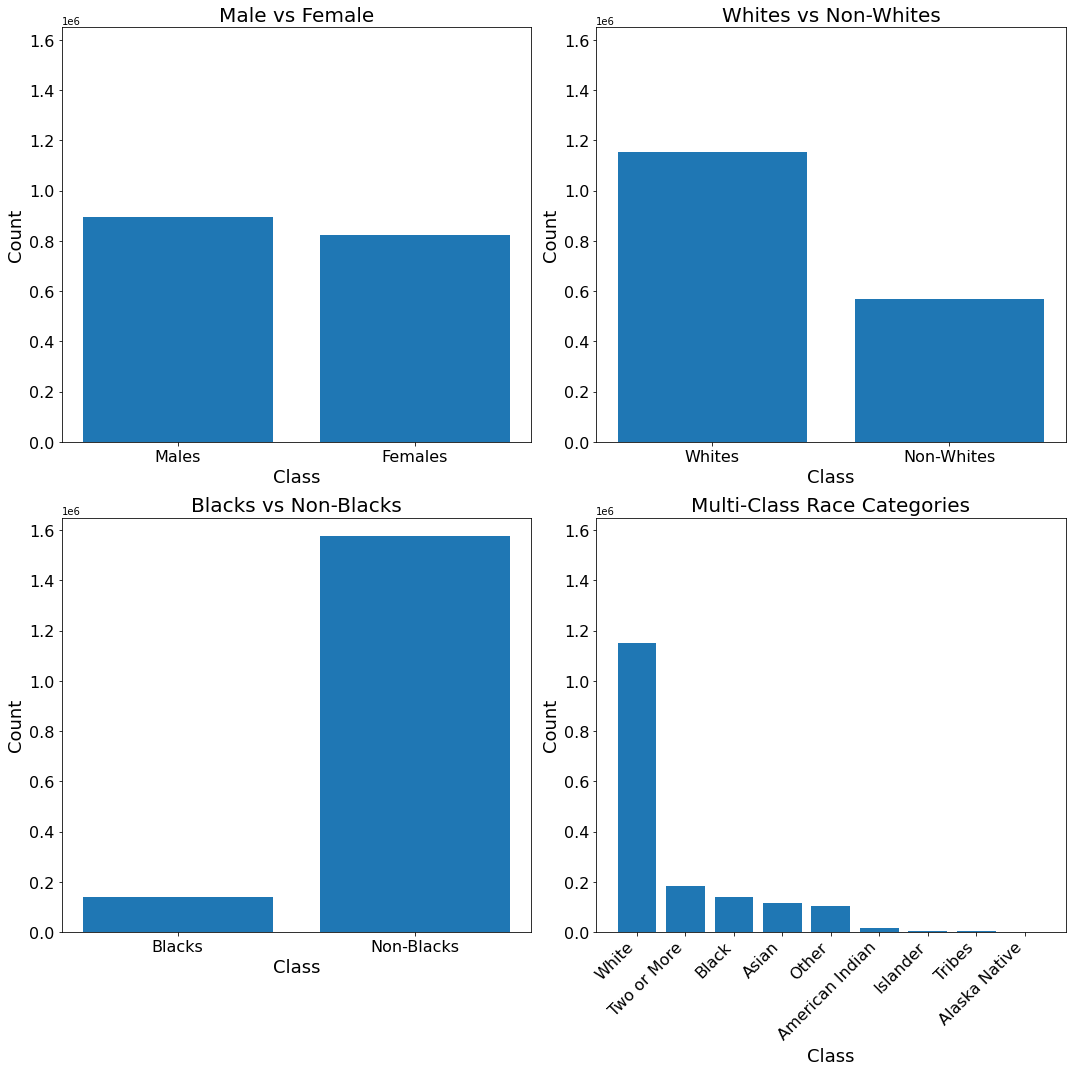

In [39]:
# Data for binary classifications
sex = {
    'Category': ['Males', 'Females'],
    'Count': [895612, 824542]
}

white_nonwhite = {
    'Category': ['Whites', 'Non-Whites'],
    'Count': [1152609, 567545]
}

black_nonblack = {
    'Category': ['Blacks', 'Non-Blacks'],
    'Count': [141530, 1578624]
}

# Data for multi-class race categories
race = {
    'Category': [
        'White', 'Two or More', 'Black', 'Asian', 'Other',
        'American Indian', 'Islander',
        'Tribes', 'Alaska Native'
    ],
    'Count': [
        1152609, 183537, 141530, 115655, 104439, 16052, 2821, 2544, 967
    ]
}

# Creating the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Font sizes
title_fontsize = 20
label_fontsize = 18
tick_fontsize = 16

# Common y-axis limit
y_limit = [0, 1650000]

# Plotting binary classifications (Males vs. Females)
axes[0, 0].bar(sex['Category'], sex['Count'])
axes[0, 0].set_ylabel('Count', fontsize=label_fontsize)
axes[0, 0].set_xlabel('Class', fontsize=label_fontsize)
axes[0, 0].set_title('Male vs Female', fontsize=title_fontsize)
axes[0, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[0, 0].set_ylim(y_limit)

# Plotting binary classifications (Whites vs. Non-Whites)
axes[0, 1].bar(white_nonwhite['Category'], white_nonwhite['Count'])
axes[0, 1].set_ylabel('Count', fontsize=label_fontsize)
axes[0, 1].set_xlabel('Class', fontsize=label_fontsize)
axes[0, 1].set_title('Whites vs Non-Whites', fontsize=title_fontsize)
axes[0, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[0, 1].set_ylim(y_limit)

# Plotting binary classifications (Blacks vs. Non-Blacks)
axes[1, 0].bar(black_nonblack['Category'], black_nonblack['Count'])
axes[1, 0].set_ylabel('Count', fontsize=label_fontsize)
axes[1, 0].set_xlabel('Class', fontsize=label_fontsize)
axes[1, 0].set_title('Blacks vs Non-Blacks', fontsize=title_fontsize)
axes[1, 0].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[1, 0].set_ylim(y_limit)

# Plotting multi-class race categories
axes[1, 1].bar(race['Category'], race['Count'])
axes[1, 1].set_ylabel('Count', fontsize=label_fontsize)
axes[1, 1].set_xlabel('Class', fontsize=label_fontsize)
axes[1, 1].set_title('Multi-Class Race Categories', fontsize=title_fontsize)
axes[1, 1].tick_params(axis='both', which='major', labelsize=tick_fontsize)
axes[1, 1].set_xticklabels(race['Category'], rotation=45, ha='right', fontsize=tick_fontsize)
axes[1, 1].set_ylim(y_limit)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
